In [1]:
import featurization
import pandas as pd
import geopandas
import helpers
%load_ext autoreload
%autoreload 2

In [71]:
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point, Polygon
import seaborn as sns

In [3]:
geodf = featurization.all_featurization("all-sc-bike-data-1101.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [116]:
zoningdf = geopandas.read_file('Zoning')

In [108]:
zoningdf.head()

,OBJECTID,ZONING,SHAPE_LENG,SHAPEarea,SHAPElen,geometry
0,23,CC,0.005469,1.125082e+05,1772.315833,"POLYGON ((6115648.111000001 1818541.042999998,..."
1,24,PK,0.002634,4.084068e+04,881.121721,"POLYGON ((6114770.856000006 1817930.811000004,..."
2,25,RM,0.013191,5.012602e+05,4361.125116,"POLYGON ((6114341.5 1818988.125, 6114368.22599..."
3,26,CT,0.020528,1.400059e+06,6890.346622,"POLYGON ((6114905.5 1819702.375, 6115071.5 181..."
4,27,CC,0.003188,5.038172e+04,1046.563196,"POLYGON ((6115484.502000004 1817765.548999995,..."


In [119]:
geodf.local_time_start.dt.dayofweek

58       1
59       1
39       1
14       2
43       2
0        2
15       3
62       3
24       3
44       3
27       3
18       3
13       3
4        3
25       3
35       4
36       4
5        4
34       5
7        5
29       5
48       5
6        5
47       6
46       6
11       6
10       6
19       6
20       6
52       0
        ..
11382    2
11385    2
11388    2
11389    2
11368    2
11374    4
11383    4
11386    4
11357    5
11350    6
11351    6
11379    6
11390    6
11362    6
11376    6
11373    0
11352    0
11381    0
11393    0
11392    0
11375    1
11384    1
11369    1
11349    1
11347    1
11387    2
11358    2
11354    2
11353    2
11380    2
Name: local_time_start, Length: 10472, dtype: int64

In [114]:
geodf = geodf.to_crs(epsg=2227)

In [115]:
geodf.crs

{'init': 'epsg:2227', 'no_defs': True}

In [110]:
zoningdf = zoningdf.to_crs(epsg=4326)

In [111]:
zoningdf.crs

{'init': 'epsg:4326', 'no_defs': True}

In [117]:
zoningdf.drop(['OBJECTID', 'SHAPE_LENG', 'SHAPEarea', 'SHAPElen'], axis = 1, inplace=True)

In [118]:
geodf_plus = geopandas.sjoin(geodf, zoningdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [12]:
geodf_plus.fillna(value = 'out', inplace=True)

In [13]:
geodf_plus.head()

,bike_id,lat,lon,idle_time,batt_start,batt_end,utc_time_start,utc_time_end,local_time_start,gets_pickedup_charged,gets_pickedup_not_charged,in_charger,next_action,geolocation,index_right,ZONING
58,bike_20631,36.98725,-122.03416,00:47:18,94,94,2018-10-23 19:26:39+00:00,2018-10-23 20:13:57+00:00,2018-10-23 12:26:39-07:00,False,False,False,rented,POINT (-122.03416 36.98725),36,IG
59,bike_20631,36.98733,-122.03417,00:51:33,96,96,2018-10-23 20:28:01+00:00,2018-10-23 21:19:34+00:00,2018-10-23 13:28:01-07:00,False,False,False,rented,POINT (-122.03417 36.98733),36,IG
39,bike_20631,36.97425,-122.02437,00:05:13,93,93,2018-10-23 21:37:55+00:00,2018-10-23 21:43:08+00:00,2018-10-23 14:37:55-07:00,False,False,False,rented,POINT (-122.02437 36.97425),209,CBD
14,bike_20631,36.96690,-122.04056,02:13:47,49,49,2018-10-25 01:11:07+00:00,2018-10-25 03:24:54+00:00,2018-10-24 18:11:07-07:00,False,False,False,rented,POINT (-122.04056 36.9669),187,CC
43,bike_20631,36.97576,-122.02842,00:15:05,42,42,2018-10-25 03:44:59+00:00,2018-10-25 04:00:04+00:00,2018-10-24 20:44:59-07:00,False,False,False,rented,POINT (-122.02842 36.97576),209,CBD


basemap link is down


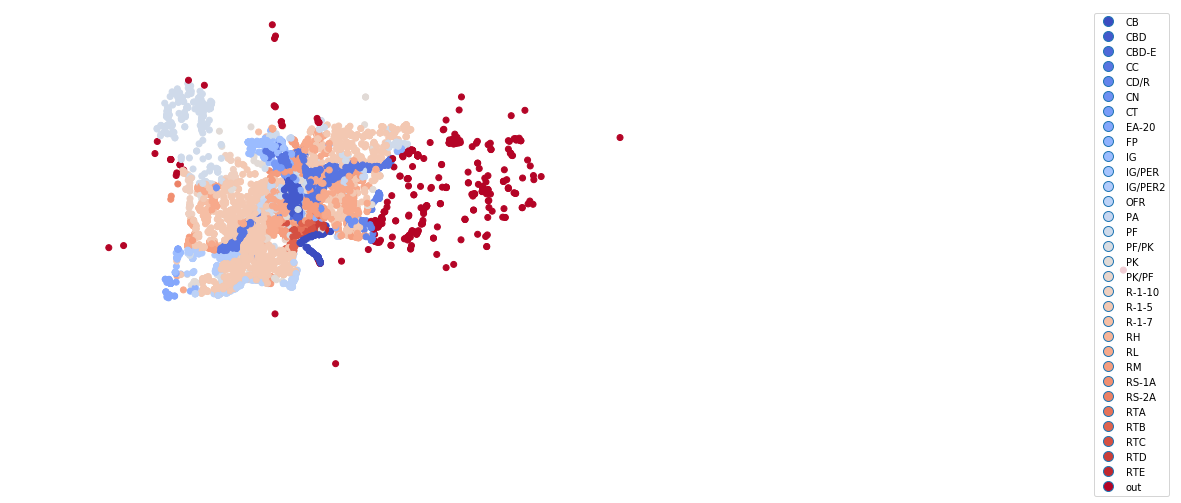

In [14]:
fig, ax = plt.subplots(1, figsize=(20, 20))
helpers.map_bikes(ax, geodf_plus, color_by='ZONING')

In [25]:
label = None

In [30]:
if label != None:
    print('True')

In [39]:
w, s, e, n = geodf.total_bounds

In [42]:
img, ext = ctx.bounds2img(w, s, e, n, 15, ll=True)

HTTPError: HTTP Error 404: Not Found

In [48]:
censusdf = geopandas.read_file('ACS_2016_5YR_BG_06_CALIFORNIA.gdb')

In [49]:
censusdf.head()

,GEOID,B00001e1,B00001m1,B00002e1,B00002m1,geometry
0,15000US060014001001,324.0,-1.0,144.0,-1.0,None
1,15000US060014002001,184.0,-1.0,78.0,-1.0,None
2,15000US060014002002,138.0,-1.0,66.0,-1.0,None
3,15000US060014003001,69.0,-1.0,29.0,-1.0,None
4,15000US060014003002,89.0,-1.0,42.0,-1.0,None


In [15]:
import fiona
fiona.listlayers('ACS_2016_5YR_BG_06_CALIFORNIA.gdb')

['X00_COUNTS',
 'X01_AGE_AND_SEX',
 'X02_RACE',
 'X03_HISPANIC_OR_LATINO_ORIGIN',
 'X07_MIGRATION',
 'X08_COMMUTING',
 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 'X12_MARITAL_STATUS_AND_HISTORY',
 'X14_SCHOOL_ENROLLMENT',
 'X15_EDUCATIONAL_ATTAINMENT',
 'X16_LANGUAGE_SPOKEN_AT_HOME',
 'X17_POVERTY',
 'X19_INCOME',
 'X20_EARNINGS',
 'X21_VETERAN_STATUS',
 'X22_FOOD_STAMPS',
 'X23_EMPLOYMENT_STATUS',
 'X24_INDUSTRY_OCCUPATION',
 'X25_HOUSING_CHARACTERISTICS',
 'X27_HEALTH_INSURANCE',
 'X99_IMPUTATION',
 'BG_METADATA_2016',
 'ACS_2016_5YR_BG_06_CALIFORNIA']

In [20]:
blockgroupdf = geopandas.read_file('ACS_2016_5YR_BG_06_CALIFORNIA.gdb', driver='FileGDB', layer='ACS_2016_5YR_BG_06_CALIFORNIA')

In [44]:
bbox = geodf.total_bounds

p1 = Point(bbox[0], bbox[3])
p2 = Point(bbox[2], bbox[3])
p3 = Point(bbox[2], bbox[1])
p4 = Point(bbox[0], bbox[1])

np1 = (p1.coords.xy[0][0], p1.coords.xy[1][0])
np2 = (p2.coords.xy[0][0], p2.coords.xy[1][0])
np3 = (p3.coords.xy[0][0], p3.coords.xy[1][0])
np4 = (p4.coords.xy[0][0], p4.coords.xy[1][0])

bounds = Polygon([np1, np2, np3, np4])

In [46]:
bounds = geopandas.GeoDataFrame(geopandas.GeoSeries(bounds), columns=['geometry'])
blockgroupdf_clip = geopandas.overlay(bounds, blockgroupdf, how='intersection')

/anaconda3/lib/python3.6/site-packages/geopandas/base.py:29: UserWarning: GeoSeries crs mismatch: None and {}
  other.crs))


In [74]:
blockgroupdf.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data,geometry
0,06,025,940000,3,060259400003,Block Group 3,G5030,S,12266417.0,680361.0,+32.7424027,-114.6675664,0.297760,0.001246,15000US060259400003,(POLYGON ((-114.7265310004053 32.7182359995917...
1,06,025,010800,2,060250108002,Block Group 2,G5030,S,59331725.0,0.0,+32.7658550,-115.3923892,0.354064,0.005710,15000US060250108002,(POLYGON ((-115.4308169997047 32.7309030000734...
2,06,025,010800,1,060250108001,Block Group 1,G5030,S,230656791.0,0.0,+32.8363463,-115.3514134,0.891100,0.022214,15000US060250108001,(POLYGON ((-115.4578350000851 32.9089530000809...
3,06,025,011100,3,060250111003,Block Group 3,G5030,S,1209336.0,0.0,+32.7932442,-115.6903925,0.062503,0.000116,15000US060250111003,(POLYGON ((-115.7013419996335 32.7908540002119...
4,06,073,010013,2,060730100132,Block Group 2,G5030,S,404606.0,0.0,+32.5564082,-117.0507980,0.031215,0.000039,15000US060730100132,(POLYGON ((-117.0543010002909 32.5554239999177...


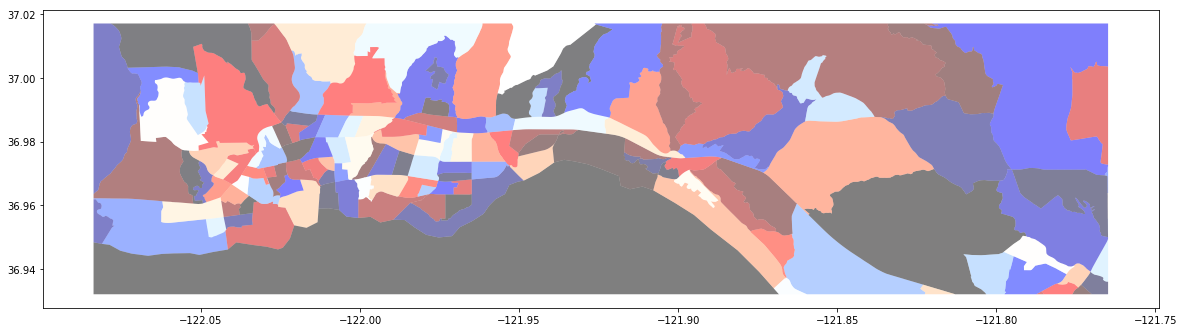

In [70]:
fig, ax = plt.subplots(1, figsize=(20, 20))
blockgroupdf_clip.plot(ax=ax, column = 'GEOID_Data', cmap='flag', alpha=0.5)

In [23]:
blockgroupdf.crs

{}

In [22]:
geodf_blockgroup = geopandas.sjoin(geodf, blockgroupdf, how="left", op='intersects')

In [75]:
geodf_blockgroup.head()

,bike_id,lat,lon,idle_time,batt_start,batt_end,utc_time_start,utc_time_end,local_time_start,gets_pickedup_charged,...,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Length,Shape_Area,GEOID_Data
58,bike_20631,36.98725,-122.03416,00:47:18,94,94,2018-10-23 19:26:39+00:00,2018-10-23 20:13:57+00:00,2018-10-23 12:26:39-07:00,False,...,Block Group 1,G5030,S,4537397.0,36195.0,+36.9944065,-122.0430849,0.129009,0.000463,15000US060871003001
59,bike_20631,36.98733,-122.03417,00:51:33,96,96,2018-10-23 20:28:01+00:00,2018-10-23 21:19:34+00:00,2018-10-23 13:28:01-07:00,False,...,Block Group 1,G5030,S,4537397.0,36195.0,+36.9944065,-122.0430849,0.129009,0.000463,15000US060871003001
39,bike_20631,36.97425,-122.02437,00:05:13,93,93,2018-10-23 21:37:55+00:00,2018-10-23 21:43:08+00:00,2018-10-23 14:37:55-07:00,False,...,Block Group 2,G5030,S,482046.0,0.0,+36.9756263,-122.0277058,0.035951,0.000049,15000US060871007002
14,bike_20631,36.96690,-122.04056,02:13:47,49,49,2018-10-25 01:11:07+00:00,2018-10-25 03:24:54+00:00,2018-10-24 18:11:07-07:00,False,...,Block Group 1,G5030,S,459434.0,0.0,+36.9725210,-122.0379093,0.039129,0.000046,15000US060871006001
43,bike_20631,36.97576,-122.02842,00:15:05,42,42,2018-10-25 03:44:59+00:00,2018-10-25 04:00:04+00:00,2018-10-24 20:44:59-07:00,False,...,Block Group 2,G5030,S,482046.0,0.0,+36.9756263,-122.0277058,0.035951,0.000049,15000US060871007002


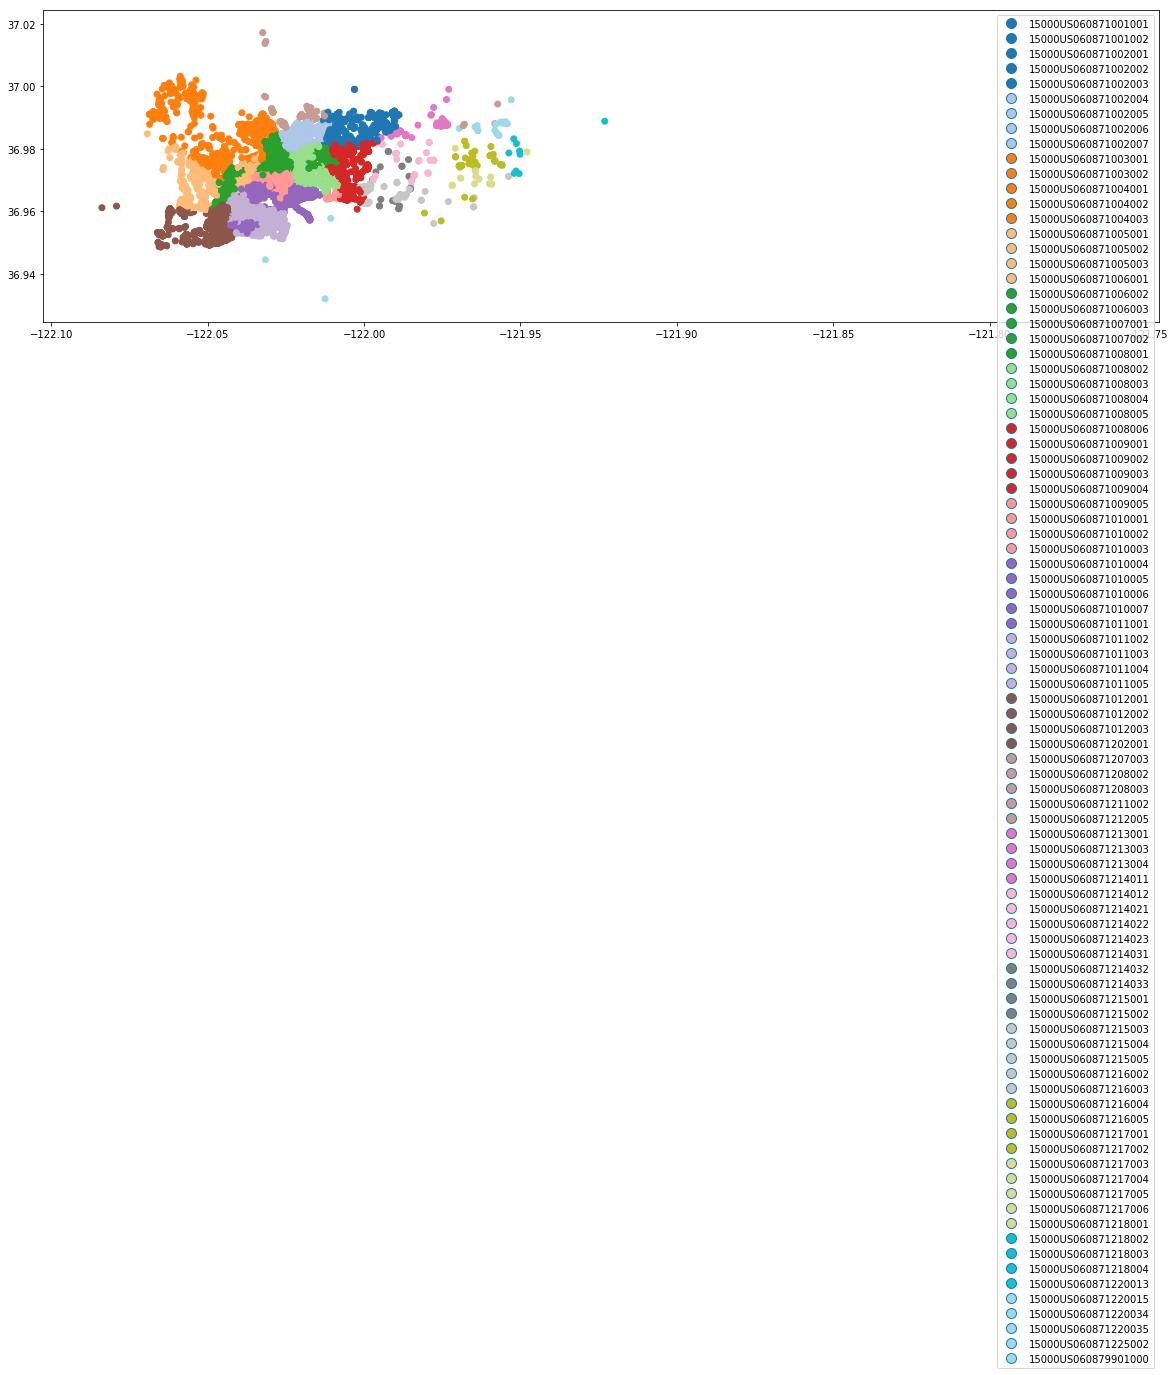

In [24]:
fig, ax = plt.subplots(1, figsize=(20, 20))
geodf_blockgroup.plot(ax=ax, column = 'GEOID_Data', legend = True, cmap='tab20')

In [98]:
#geodf_blockgroup.idle_time.dt.seconds

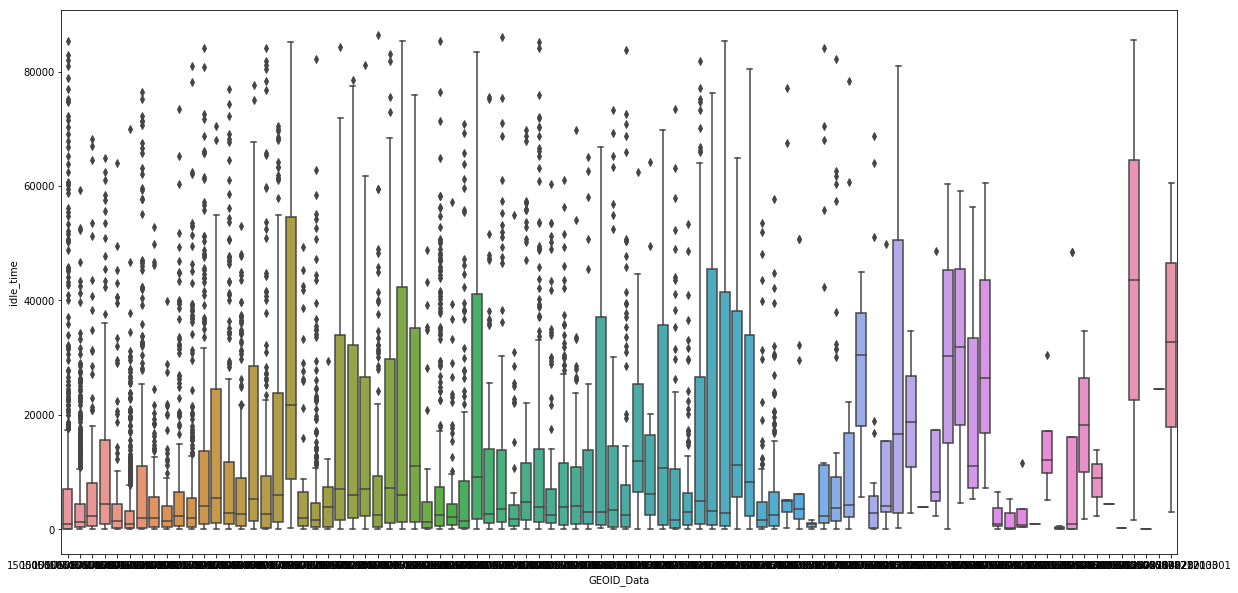

In [103]:
fig, ax = plt.subplots(1, figsize=(20, 10))
sns.boxplot(x=geodf_blockgroup['GEOID_Data'], y=geodf_blockgroup['idle_time'].dt.seconds, ax=ax)

In [25]:
blockgroup_groups = geodf_blockgroup.groupby(by='GEOID_Data', axis=0)
blockgroup_groups.size().describe()

count      90.000000
mean      116.355556
std       177.819648
min         1.000000
25%         4.250000
50%        58.500000
75%       148.250000
max      1001.000000
dtype: float64

In [26]:
blockgroup_groups.size()

GEOID_Data
15000US060871001001      71
15000US060871001002      67
15000US060871002001     145
15000US060871002002      53
15000US060871002003     138
15000US060871002004      56
15000US060871002005     121
15000US060871002006     225
15000US060871002007     170
15000US060871003001     674
15000US060871003002     146
15000US060871004001     173
15000US060871004002      70
15000US060871004003      61
15000US060871005001      67
15000US060871005002     149
15000US060871005003     168
15000US060871006001     228
15000US060871006002     125
15000US060871006003      61
15000US060871007001     244
15000US060871007002    1001
15000US060871008001     251
15000US060871008002      52
15000US060871008003     252
15000US060871008004     303
15000US060871008005      71
15000US060871008006      68
15000US060871009001     146
15000US060871009002     236
                       ... 
15000US060871214022      11
15000US060871214023       2
15000US060871214031       4
15000US060871214032       5
15000US06

In [50]:
tractdf = geopandas.read_file('Tract_2010Census_DP1')

In [52]:
tractdf.columns

Index(['GEOID10', 'NAMELSAD10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'DP0010001', 'DP0010002', 'DP0010003', 'DP0010004',
       ...
       'DP0210001', 'DP0210002', 'DP0210003', 'DP0220001', 'DP0220002',
       'DP0230001', 'DP0230002', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object', length=195)

In [55]:
tractdf.head()

,GEOID10,NAMELSAD10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,DP0010001,DP0010002,DP0010003,DP0010004,...,DP0210001,DP0210002,DP0210003,DP0220001,DP0220002,DP0230001,DP0230002,Shape_Leng,Shape_Area,geometry
0,01005950300,Census Tract 9503,352811329.0,499970.0,+31.7908933,-085.5670514,1638,98,87,88,...,673,544,129,1283,355,2.36,2.75,1.164633,0.033648,POLYGON ((-85.52743699999996 31.86650300000008...
1,01005950900,Census Tract 9509,16201446.0,8339342.0,+31.8467221,-085.1462332,4583,456,387,363,...,1784,857,927,2196,2387,2.56,2.57,0.280687,0.002338,POLYGON ((-85.16412199999996 31.83059499999996...
2,01005950800,Census Tract 9508,14630162.0,380622.0,+31.9206930,-085.1760317,2055,110,137,128,...,901,550,351,1257,798,2.29,2.27,0.173100,0.001431,"POLYGON ((-85.14871799999997 31.909335, -85.14..."
3,01005950700,Census Tract 9507,127200997.0,112809.0,+31.9440855,-085.2620842,1727,101,112,106,...,646,372,274,915,663,2.46,2.42,0.622975,0.012143,POLYGON ((-85.14578399999999 31.89149100000009...
4,01005950600,Census Tract 9506,101697268.0,1101261.0,+31.8783526,-085.2729215,2099,137,160,166,...,828,510,318,1295,804,2.54,2.53,0.556037,0.009798,POLYGON ((-85.14572299999998 31.89010600000006...


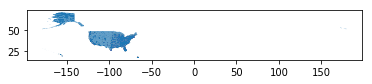

In [56]:
tractdf.plot()

In [58]:
tractdf.crs

{}

In [57]:
geodf_tract = geopandas.sjoin(geodf, tractdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


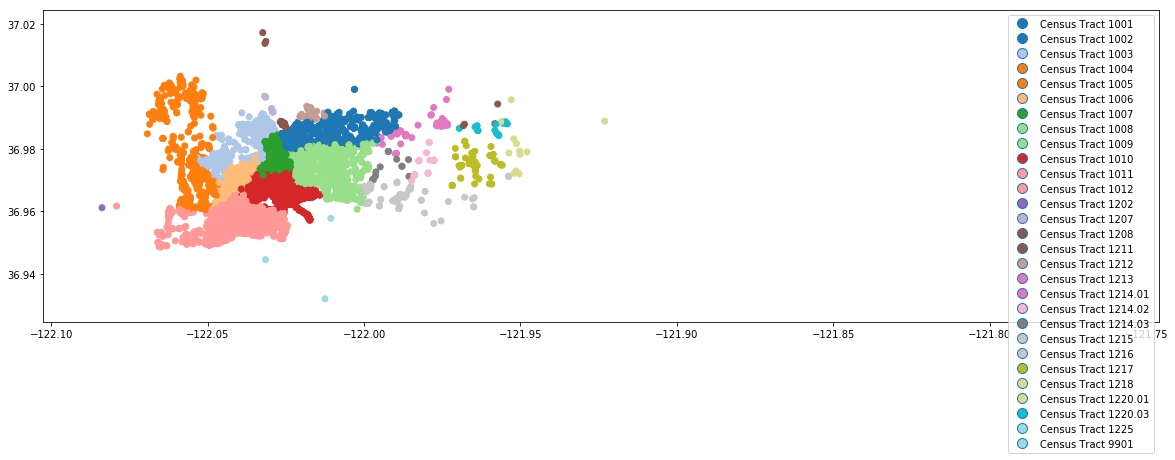

In [108]:
fig, ax = plt.subplots(1, figsize=(20, 20))
geodf_tract.plot(ax=ax, column = 'NAMELSAD10', legend = True, cmap='tab20')

In [64]:
print(geodf_tract.columns)

Index(['bike_id', 'lat', 'lon', 'idle_time', 'batt_start', 'batt_end',
       'utc_time_start', 'utc_time_end', 'local_time_start',
       'gets_pickedup_charged',
       ...
       'DP0200001', 'DP0210001', 'DP0210002', 'DP0210003', 'DP0220001',
       'DP0220002', 'DP0230001', 'DP0230002', 'Shape_Leng', 'Shape_Area'],
      dtype='object', length=209)


In [68]:
blockdf = geopandas.read_file('tabblock2010_06_pophu')

In [69]:
blockdf.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry
0,06,001,440336,2001,060014403362001,N,1,4,"POLYGON ((-122.010627 37.582659, -122.010821 3..."
1,06,001,440336,2022,060014403362022,N,16,66,"POLYGON ((-122.01992 37.580664, -122.019717 37..."
2,06,001,440100,1000,060014401001000,N,6,12,"POLYGON ((-121.97565 37.640444, -121.97417 37...."
3,06,001,450601,1003,060014506011003,N,0,0,"POLYGON ((-121.950215 37.661304, -121.950202 3..."
4,06,001,435103,1057,060014351031057,N,5,13,"POLYGON ((-121.969345 37.643885, -121.969286 3..."


In [70]:
geodf_block = geopandas.sjoin(geodf, blockdf, how="left", op='intersects')

/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


In [77]:
len(geodf_block.BLOCKID10.unique())

837

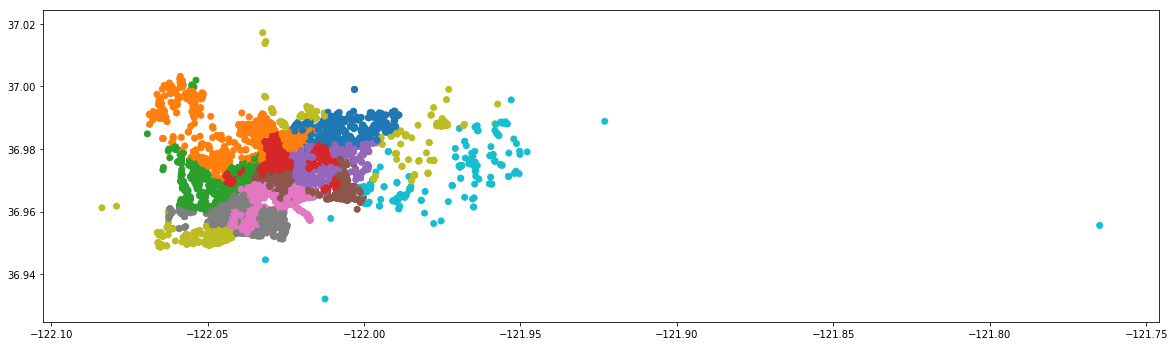

In [80]:
fig, ax = plt.subplots(1, figsize=(20, 20))
geodf_block.plot(ax=ax, column = 'BLOCKID10')

In [95]:
block_groups = geodf_block.groupby(by='BLOCKID10', axis=0)

In [97]:
block_groups.size().describe()

count    837.000000
mean      12.511350
std       25.343363
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      342.000000
dtype: float64

In [98]:
tract_groups = geodf_tract.groupby(by='NAMELSAD10', axis=0)

In [99]:
tract_groups.size().describe()

count      29.000000
mean      361.103448
std       561.367549
min         1.000000
25%        11.000000
50%        56.000000
75%       702.000000
max      2489.000000
dtype: float64

In [100]:
tract_groups.size()

NAMELSAD10
Census Tract 1001        138
Census Tract 1002        908
Census Tract 1003        820
Census Tract 1004        304
Census Tract 1005        384
Census Tract 1006        414
Census Tract 1007       1245
Census Tract 1008        997
Census Tract 1009        702
Census Tract 1010       2489
Census Tract 1011        858
Census Tract 1012        833
Census Tract 1202          1
Census Tract 1207          7
Census Tract 1208         28
Census Tract 1211          4
Census Tract 1212         44
Census Tract 1213         27
Census Tract 1214.01      56
Census Tract 1214.02      25
Census Tract 1214.03      16
Census Tract 1215         68
Census Tract 1216         11
Census Tract 1217         57
Census Tract 1218          9
Census Tract 1220.01       3
Census Tract 1220.03      20
Census Tract 1225          1
Census Tract 9901          3
dtype: int64